<a href="https://colab.research.google.com/github/kimminse3380/yolo_sleep_detection/blob/master/yolo_custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and Import Dependencies

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rlf49zMCPeCsUYZYTgJn")
project = rf.workspace("bssm-wu5v5").project("2ndtest")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to 2ndtest-1 in yolov5pytorch:: 100%|██████████| 168/168 [00:00<00:00, 2783.24it/s]


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15348, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15348 (delta 2), reused 6 (delta 0), pack-reused 15335
Receiving objects: 100% (15348/15348), 14.22 MiB | 7.11 MiB/s, done.
Resolving deltas: 100% (10525/10525), done.


In [ ]:
!cd yolov5 && pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.4 MB/s eta 0:00:00


In [ ]:
!pip install torch torchvision numpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip uninstall yolov5 -y
!pip install yolov5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.3/956.3 KB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.0/101.0 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116952 sha256=de59ded4b223fc0b3d4793f4e36d652d08132e973d4710c

# Load model

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-3-27 Python-3.9.16 torch-2.0.0+cu117 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 174MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
# Image
img = 'https://school.busanedu.net/upload/bbs/files/2023/hgschl/bssm-h/ntt/5095185/03/c54f8d9136581562d7a14e518617f82e.jpg'

# Inference
results = model(img)

In [ ]:
results.print()

image 1/1: 4248x5664 15 persons
Speed: 21111.5ms pre-process, 45.1ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


<function matplotlib.pyplot.show(close=None, block=None)>

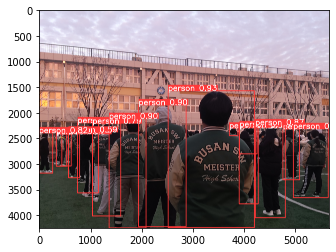

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show

# Train from scratch

In [ ]:
import uuid
import os
import time

In [5]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data data.yaml --weights /content/yolov5/runs/train/exp4/weights/last.pt --workers 2

train: weights=/content/yolov5/runs/train/exp4/weights/last.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 2 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-129-gb54fd0a Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.

# Load Custom model

In [ ]:
!pip install -U cycler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: cycler
    Found existing installation: cycler 0.10.0
    Uninstalling cycler-0.10.0:
      Successfully uninstalled cycler-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 1.0.1 requires cycler==0.10.0, but you have cycler 0.11.0 which is incompatible.
fastai 2.7.11 requires torch<1.14,>=1.7, but you have torch 2.0.0 which is incompatible.


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/yolo_sleep/yolov5/runs/train/exp3/weights/best.pt')  # local model

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-3-27 Python-3.9.16 torch-2.0.0+cu117 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
img = '/content/drive/MyDrive/yolo_sleep/dataset/test/images/awake-02615c33-c858-11ed-b897-106fd9601ea0_jpg.rf.2c370d35488627895410858011316fe4.jpg'

results = model(img)

<function matplotlib.pyplot.show(close=None, block=None)>

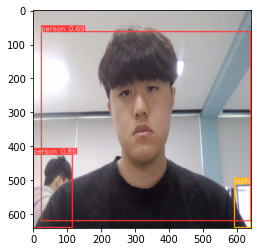

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show

# file save

In [ ]:
!git clone https://github.com/matplotlib/cycler.git

Cloning into 'cycler'...
remote: Enumerating objects: 738, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 738 (delta 86), reused 78 (delta 72), pack-reused 631
Receiving objects: 100% (738/738), 1.77 MiB | 15.72 MiB/s, done.
Resolving deltas: 100% (358/358), done.


In [ ]:
!cd cycler && python setup.py install

/usr/local/lib/python3.9/dist-packages/setuptools/config/setupcfg.py:516: SetuptoolsDeprecationWarning: The license_file parameter is deprecated, use license_files instead.
  warnings.warn(msg, warning_class)
running install
/usr/local/lib/python3.9/dist-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
running bdist_egg
running egg_info
creating cycler.egg-info
writing cycler.egg-info/PKG-INFO
writing dependency_links to cycler.egg-info/dependency_links.txt
writing top-level names to cycler.egg-info/top_level.txt
writing manifest file 'cycler.egg-info/SOURCES.txt'
reading manifest file 'cycler.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'